In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

In [2]:
## help function

def AddSeason(dataframe,colname):
    
    # Create columns giving year and month information
    dataframe.loc[:,colname] = dataframe.loc[:,colname].astype('str')

    dataframe['Year'] = list(dataframe.loc[:,colname].str.slice(0,4).values)
    dataframe['Month'] = list(dataframe.loc[:,colname].str.slice(4,6).values)

    # create four lists of month that tell which season the month belong to 
    season1 = ['01','02','03']
    season2 = ['04','05','06']
    season3 = ['07','08','09']
    season4 = ['10','11','12']

    # create a list of conditions to get new column indicating which season it belong to 
    conditions = [
        (dataframe['Month'].isin(season1)),
        (dataframe['Month'].isin(season2)),
        (dataframe['Month'].isin(season3)),
        (dataframe['Month'].isin(season4))
        ]

    # create the values for those want to assign to based on conditions
    values = ['I', 'II', 'III', 'IV']

    # create a new column as the Season depending condition from column 'Month'
    dataframe['Season'] = np.select(conditions, values)
    return dataframe

In [323]:
df_ID

,_id,MonthEnding,HBT,HBTQF,PatientType,Specialty,SpecialtyQF,NumberWaiting,NumberWaitingQF,NumberWaitingOver12Weeks,NumberWaitingOver12WeeksQF
59109,59110,20130228,S92000003,d,Inpatient/Day case,Z9,d,49021.0,NaN,708.0,NaN
59110,59111,20140228,S92000003,d,Inpatient/Day case,Z9,d,55665.0,NaN,1231.0,NaN
59111,59112,20150228,S92000003,d,Inpatient/Day case,Z9,d,56572.0,NaN,2408.0,NaN
59112,59113,20170228,S92000003,d,Inpatient/Day case,Z9,d,63481.0,NaN,11468.0,NaN
59114,59115,20190228,S92000003,d,Inpatient/Day case,Z9,d,77359.0,NaN,25376.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
97528,97529,20171231,S08000028,NaN,Inpatient/Day case,F2,NaN,25.0,NaN,0.0,NaN
97529,97530,20181231,S08000028,NaN,Inpatient/Day case,F2,NaN,22.0,NaN,0.0,NaN
97530,97531,20191231,S08000028,NaN,Inpatient/Day case,F2,NaN,9.0,NaN,0.0,NaN
97531,97532,20201231,S08000028,NaN,Inpatient/Day case,F2,NaN,14.0,NaN,1.0,NaN


In [3]:
# read the dataset of ongoing waits
df = pd.read_csv("ongoing waits.csv",encoding = 'utf-8')

# drop those useless data
ind_drop = df[(df.NumberWaitingQF == ':u')|(df.NumberWaitingQF == ':')].index
new_df = df.drop(ind_drop)

# Create dataset that only contain information of Inpatient and Daycase that we are interested
df_ID = new_df[new_df.PatientType == 'Inpatient/Day case']


# Rearrange data
data = df_ID.copy()

data = AddSeason(data,'MonthEnding')


# sort data according to time sequence

data = data.sort_values(by = ['MonthEnding']).reset_index(drop = True)
data.head()

,_id,MonthEnding,HBT,HBTQF,PatientType,Specialty,SpecialtyQF,NumberWaiting,NumberWaitingQF,NumberWaitingOver12Weeks,NumberWaitingOver12WeeksQF,Year,Month,Season
0,76942,20121031,S08000024,NaN,Inpatient/Day case,C8,NaN,653.0,NaN,0.0,NaN,2012,10,IV
1,79296,20121031,S08000015,NaN,Inpatient/Day case,AQ,NaN,4.0,NaN,0.0,NaN,2012,10,IV
2,79426,20121031,S08000015,NaN,Inpatient/Day case,C11,NaN,409.0,NaN,0.0,NaN,2012,10,IV
3,70550,20121031,S08000020,NaN,Inpatient/Day case,AR,NaN,1.0,NaN,0.0,NaN,2012,10,IV
4,62715,20121031,S92000003,d,Inpatient/Day case,AQ,NaN,151.0,NaN,0.0,NaN,2012,10,IV


In [4]:
data_month = data.groupby(["Year","Month"]).sum().reset_index()
data_year = data.groupby(["Year",'Season']).sum().reset_index()

## Explore data analysis
*** describe the data
1. summary the data

In [5]:
# data.info()

In [5]:
# Check any missing value 

def NAcheck(dataframe):
    print("Number of Missing Values in demography data")
    print(pd.DataFrame(dataframe, columns=list(dataframe.columns)).isna().sum())#

    print('\nWhich columns contains missing value:')
    print(dataframe.columns[dataframe.isnull().any()].tolist())

NAcheck(data)

Number of Missing Values in demography data
_id                               0
MonthEnding                       0
HBT                               4
HBTQF                         29211
PatientType                       0
Specialty                         0
SpecialtyQF                   30925
NumberWaiting                     0
NumberWaitingQF               32721
NumberWaitingOver12Weeks          0
NumberWaitingOver12WeeksQF    32721
Year                              0
Month                             0
Season                            0
dtype: int64

Which columns contains missing value:
['HBT', 'HBTQF', 'SpecialtyQF', 'NumberWaitingQF', 'NumberWaitingOver12WeeksQF']


In [353]:
set(data.HBT.unique())

{'S08000015',
 'S08000016',
 'S08000017',
 'S08000019',
 'S08000020',
 'S08000022',
 'S08000024',
 'S08000025',
 'S08000026',
 'S08000028',
 'S08000029',
 'S08000030',
 'S08000031',
 'S08000032',
 'S92000003',
 'SB0801'}

In [394]:
data[data.HBT == 'SB0801'].NumberWaiting.sum()

232819.0

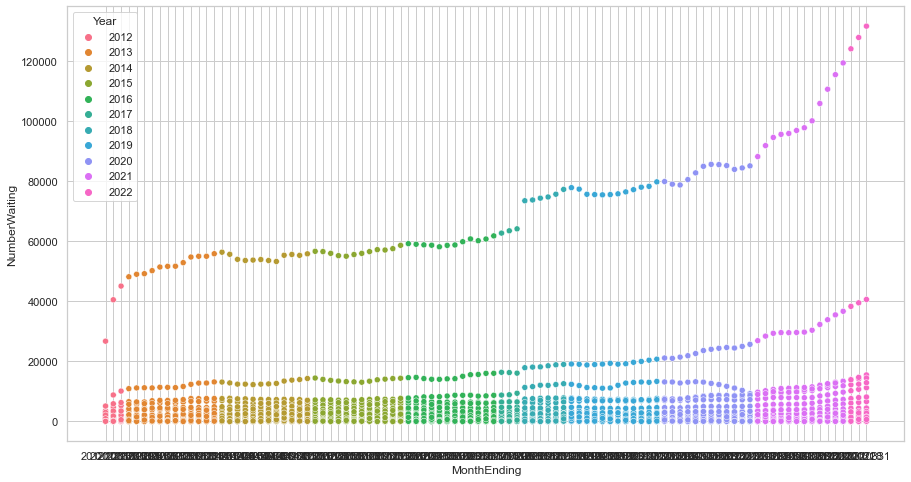

In [397]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = data[(data.HBT == 'S92000003')],
                x = 'MonthEnding', y = 'NumberWaiting',hue = 'Year')
plt.show()

In [386]:
data[(data.HBT == 'SB0801')&(data.Year == '2018')]

,_id,MonthEnding,HBT,HBTQF,PatientType,Specialty,SpecialtyQF,NumberWaiting,NumberWaitingQF,NumberWaitingOver12Weeks,NumberWaitingOver12WeeksQF,Year,Month,Season
18113,78501,20180131,SB0801,NaN,Inpatient/Day case,C42,NaN,84.0,NaN,0.0,NaN,2018,01,I
18164,59848,20180131,SB0801,NaN,Inpatient/Day case,Z9,d,1016.0,NaN,11.0,NaN,2018,01,I
18219,78263,20180131,SB0801,NaN,Inpatient/Day case,AQ,NaN,33.0,NaN,0.0,NaN,2018,01,I
18253,78149,20180131,SB0801,NaN,Inpatient/Day case,A2,NaN,685.0,NaN,6.0,NaN,2018,01,I
18284,78387,20180131,SB0801,NaN,Inpatient/Day case,C41,NaN,214.0,NaN,5.0,NaN,2018,01,I
18304,78453,20180228,SB0801,NaN,Inpatient/Day case,C42,NaN,76.0,NaN,0.0,NaN,2018,02,I
18335,78101,20180228,SB0801,NaN,Inpatient/Day case,A2,NaN,621.0,NaN,23.0,NaN,2018,02,I
18384,78215,20180228,SB0801,NaN,Inpatient/Day case,AQ,NaN,36.0,NaN,0.0,NaN,2018,02,I
18390,78339,20180228,SB0801,NaN,Inpatient/Day case,C41,NaN,196.0,NaN,7.0,NaN,2018,02,I
18391,59800,20180228,SB0801,NaN,Inpatient/Day case,Z9,d,929.0,NaN,30.0,NaN,2018,02,I


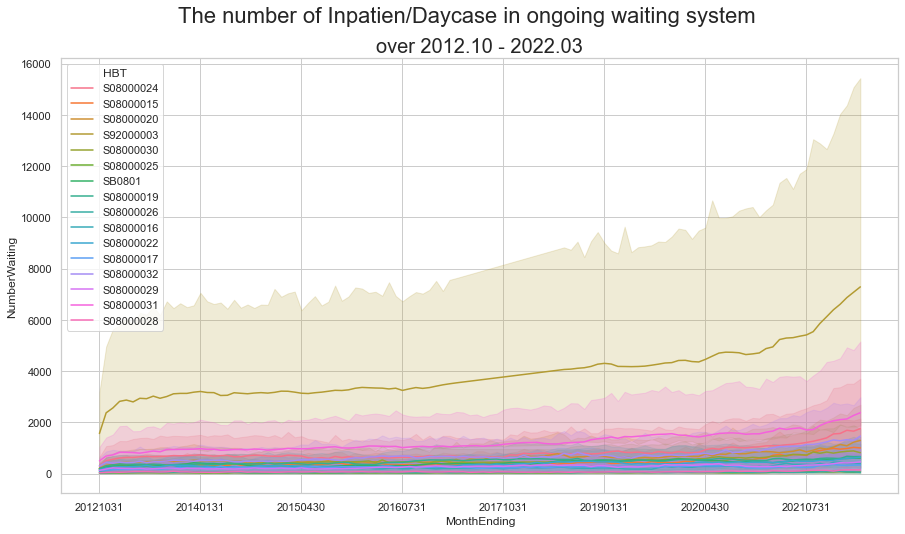

In [325]:
# drop missing value for unknown HBT as there only a very limited number
# of data observed for unknown HBT
data = data[-data.HBT.isnull()]


# the number of Inpatien/Daycase over time
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
ax = sns.lineplot(data = data,y = 'NumberWaiting',x = 'MonthEnding',hue = 'HBT')
ax.xaxis.set_major_locator(MultipleLocator(15))


plt.suptitle("The number of Inpatien/Daycase in ongoing waiting system",y= 0.97, fontsize=22)

# manually set the interval 
plt.title("over 2012.10 - 2022.03", fontsize=20)
plt.show()

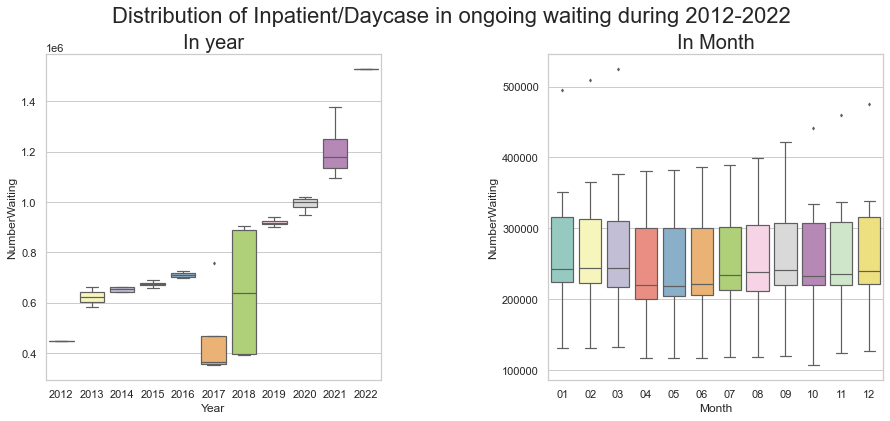

In [7]:
# explore distribution of data for each month over the decade 2012-2022
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 6))
    
plt.subplots_adjust(wspace=0.5,hspace=0.3)
ax1=  plt.subplot(121)
sns.boxplot(data=data_year,x='Year',y = 'NumberWaiting',palette="Set3",linewidth=1.2, 
                 fliersize=2)
ax1.set_title("In year", fontsize=20)

ax2=  plt.subplot(122)
sns.boxplot(data=data_month,x='Month',y = 'NumberWaiting',
            order = ['01','02','03','04','05','06','07','08','09','10','11','12'],
            palette="Set3",linewidth=1.2, fliersize=2)
ax2.set_title("In Month", fontsize=20)

# Create a title
title = 'Distribution of Inpatient/Daycase in ongoing waiting during 2012-2022'
fig.suptitle(title, y=.99, fontsize=22)
plt.show()

In [ ]:
##################################demography dara
#对于人口数据，将人口更新数据和人口预测数据结合

In [8]:
data_demo = pd.read_csv("HBdemography.csv",encoding = 'utf-8')
data_demo = data_demo[(data_demo.Year >= 2012) &(data_demo.Year <= 2020)]

data_proj = pd.read_csv("hb_pop_proj_03072020.csv",encoding = 'utf-8')
data_proj = data_proj[(data_proj.Year >= 2021) &(data_proj.Year <= 2022)]

data_population = pd.concat([data_demo,data_proj])


In [9]:
# Check any missing value 
NAcheck(data_population)


basicinfor = ['Year','HB','Sex','AllAges']
children_cols = data_population.columns[7:26].to_list()
older_cols = data_population.columns[73:].to_list()

# Combine demography data with poplation projection
# as we only have demography data for 2012-2020 but have ongoing waits data for 2012-2022
# we will use the population projection for 2021 and 2022 as the demography statistis
df_population = data_population.loc[:,basicinfor]
df_population['Children'] = data_population[children_cols].sum(axis=1)
df_population['Older'] = data_population[older_cols].sum(axis=1)

# Display aggregated population data 
df_population.head()

Number of Missing Values in demography data
_id           90
Year           0
HB             0
HBQF         462
Sex            0
            ... 
Age86          0
Age87          0
Age88          0
Age89          0
Age90plus      0
Length: 98, dtype: int64

Which columns contains missing value:
['_id', 'HBQF', 'SexQF']


,Year,HB,Sex,AllAges,Children,Older
1395,2012,S92000003,All,5313600,1102603,852570
1396,2012,S92000003,Female,2736310,537925,485133
1397,2012,S92000003,Male,2577290,564678,367437
1398,2012,S08000015,All,373220,77792,68604
1399,2012,S08000015,Female,194546,38107,38702


In [10]:
data_explore = data.copy()
data_explore = data_explore.loc[:,['MonthEnding','HBT','PatientType','Specialty','NumberWaiting',
                                  'NumberWaitingOver12Weeks','Year','Month','Season']]
data_explore=data_explore.rename(columns = {'HBT':'HB'})

In [11]:
# conver long dataframe of population data into wide one 
# then we can combine the population data with ongoing waits data according to HBT and year
df_plnLong = df_population.pivot_table(index=["Year", "HB"], columns='Sex', 
                                       values=['AllAges','Children','Older']).reset_index()

# change the name of new long population dataframe 
df_plnLong.columns = ['Year','HB',
                      'AllAges_all','AllAges_female','AllAges_male',
                      'Children_all','Children_female','Children_male',
                      'Older_all','Older_female','Older_male']

# change the type of column 'Year' in population dataframe
# in order to make it consistent to that of data explore dataframe
# so that we can do futher merge
df_plnLong.loc[:,'Year'] = df_plnLong.loc[:,'Year'].astype('str')

#
data_explore = pd.merge(data_explore, df_plnLong,on = ['Year','HB'],how="left")



In [306]:
## as if do not need gender data for children and older
# df_plnLong = df_population.pivot_table(index=["Year", "HB"], columns='Sex', 
#                                        values=['AllAges','Children','Older']).reset_index()

# test = pd.merge(df_population, df_plnLong, how="inner", on=["Year", "HB"])
# test[pd.merge(df_population, df_plnLong, how="inner", on=["Year", "HB"]).Sex == 'All']

In [12]:
#checkanyNA
data_explore[data_explore.isnull().any(axis=1)]

# here we got HB SB0801 all missing with demography statistics

,MonthEnding,HB,PatientType,Specialty,NumberWaiting,NumberWaitingOver12Weeks,Year,Month,Season,AllAges_all,AllAges_female,AllAges_male,Children_all,Children_female,Children_male,Older_all,Older_female,Older_male
23,20121031,SB0801,Inpatient/Day case,AQ,10.0,0.0,2012,10,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,20121031,SB0801,Inpatient/Day case,Z9,469.0,0.0,2012,10,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,20121031,SB0801,Inpatient/Day case,C41,111.0,0.0,2012,10,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,20121031,SB0801,Inpatient/Day case,C42,61.0,0.0,2012,10,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,20121031,SB0801,Inpatient/Day case,A2,287.0,0.0,2012,10,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32438,20220331,SB0801,Inpatient/Day case,C41,225.0,57.0,2022,03,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32457,20220331,SB0801,Inpatient/Day case,C42,55.0,0.0,2022,03,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32501,20220331,SB0801,Inpatient/Day case,Z9,1517.0,576.0,2022,03,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32635,20220331,SB0801,Inpatient/Day case,A2,1220.0,519.0,2022,03,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# remove region SB0801: Golden Jubilee National Hospital
# This is in contrast to other health boards that 
# primarily serve the demographic area in which they are located in 
# and this is why the Golden Jubilee is not included in the 'HBdemography' and 'smid' datasets
data_explore = data_explore[-data_explore.isnull().any(axis=1)].reset_index()

In [17]:
del data_ar

In [14]:
################# addition/removal
data_ar = pd.read_csv("addtions and removals on wls.csv",encoding = 'utf-8')

# drop those useless data
ind_drop = data_ar[(data_ar.AdditionsQF == ':u')|(data_ar.AdditionsQF == ':')].index
data_ar = data_ar.drop(ind_drop)

# NAcheck(data_ar)

data_ar = data_ar[data_ar.PatientType == 'Inpatient/Day case']
data_ar.loc[:,'QuarterEnding'] = data_ar.loc[:,'QuarterEnding'].astype('str')

data_ar = AddSeason(data_ar,'QuarterEnding')
data_ar = data_ar[['HBT','Season','PatientType','Year',
                   'Specialty','Additions','Removals']].reset_index(drop = True)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [404]:
data_ar

,HBT,Season,PatientType,Year,Specialty,Additions,Removals
0,S92000003,II,Inpatient/Day case,2013,Z9,102330.0,100055.0
1,S92000003,II,Inpatient/Day case,2014,Z9,98148.0,98034.0
2,S92000003,II,Inpatient/Day case,2015,Z9,93522.0,93779.0
3,S92000003,II,Inpatient/Day case,2016,Z9,95182.0,95207.0
4,S92000003,II,Inpatient/Day case,2019,Z9,85672.0,85597.0
...,...,...,...,...,...,...,...
11738,S08000028,IV,Inpatient/Day case,2017,CB,7.0,5.0
11739,S08000028,IV,Inpatient/Day case,2018,CB,15.0,18.0
11740,S08000028,IV,Inpatient/Day case,2019,CB,22.0,25.0
11741,S08000028,IV,Inpatient/Day case,2020,CB,2.0,3.0


In [15]:
data_explore = pd.merge(data_explore,data_ar,how = 'left',
                  left_on = ['HB','Specialty','Season','PatientType','Year'],
                  right_on = ['HBT','Specialty','Season','PatientType','Year'])

# sort value by HBT and Specialty 
# so that we group items with same health board and specailty
# in this case we can fill the missing value with the corresponding adjecent valur
data_explore = data_explore.sort_values(by = ['HBT','Specialty']).reset_index(drop = True)

# impute missing value with adjecent value
data_explore = data_explore.fillna(method="ffill")

In [399]:
# data_explore


In [18]:
##################################urban_rural


# read table of two tables 
# table 1 telling 
# standard geography codes (S01) and matching labels for Data Zone 2011 in the health sector

# table 2 telling
#  urban and rural areas across Scotland defined by Scottish Government

data_zone = pd.read_csv("datazone2011.csv",encoding = 'utf-8')
data_ur= pd.read_csv("urban_rural.csv",encoding = 'utf-8')

# combine these two dataframes so that 
# we can know whether rural/urban areas the standard geography codes(HB) is
# by matching datazone
data_urzone = pd.merge(data_ur,data_zone,on = 'DataZone', how = 'left')
data_urzone = data_urzone.groupby('HB')['UrbanRural8fold2016'].mean().reset_index()


data_explore = pd.merge(data_explore,data_urzone,on = 'HB', how = 'left')

In [19]:
data_explore[data_explore.isnull().any(axis=1,)].HB.unique()
# S92000003 is missing, S92000003 is the country code for scotland
# so we can impute the missing value with mean value of other district

data_explore['UrbanRural8fold2016'] = data_explore['UrbanRural8fold2016'].fillna(
                                      data_explore['UrbanRural8fold2016'].mode()[0])

In [46]:
# NAcheck(data_explore)

In [441]:
test = pd.read_csv("simd2012_02042020.csv",encoding = 'utf-8')
sum(test[test.HB == 'S08000020'].SIMD2012Most15pc)

29

In [21]:
##################################
data_SIMD20 = pd.read_csv("simd2020v2_22062020.csv",encoding = 'utf-8')
data_SIMD16 = pd.read_csv("simd2016_18052020.csv",encoding = 'utf-8')
data_SIMD12 = pd.read_csv("simd2012_02042020.csv",encoding = 'utf-8')


def CleanedSIMD(data,colname,year):
    data = data.groupby('HB').mean().reset_index()
    data.columns = colname
    data['Year'] = year
    return data

colnames = ['HB','Rank',
            'CountryDecile','CountryQuintile',
            'HBDecile','HBQuintile',
            'HSCPDecile','HSCPQuintile',
            'CADecile','CAQuintile',
            'Most15pc','Least15pc']

data_SIMD20 = CleanedSIMD(data_SIMD20,colnames,'2020')
data_SIMD16 = CleanedSIMD(data_SIMD16,colnames,'2016')
data_SIMD12 = CleanedSIMD(data_SIMD12,colnames,'2012')

data_SIMD = pd.concat([data_SIMD20, data_SIMD16,data_SIMD12],ignore_index=True)

In [23]:
def AddYearRound(dataframe,colname):

    # create three lists of month that tell which round the year belong to 
    round1 = ['2012','2013','2014','2015']
    round2 = ['2016','2017','2018','2019']
    round3 = ['2020','2021','2022']

    # create a list of conditions to get new column indicating which year round it belong to 
    conditions = [
        (dataframe[colname].isin(round1)),
        (dataframe[colname].isin(round2)),
        (dataframe[colname].isin(round3))
        ]

    # create the values for those want to assign to based on conditions
    values = ['12-16', '16-20', '20-22']

    # create a new column as the RoundYear depending condition from column Year
    dataframe['RoundYear'] = np.select(conditions, values)
    return dataframe

In [28]:
AddYearRound(data_SIMD,'Year')

,HB,Rank,CountryDecile,CountryQuintile,HBDecile,HBQuintile,HSCPDecile,HSCPQuintile,CADecile,CAQuintile,Most15pc,Least15pc,Year,RoundYear
0,S08000015,2911.193227,4.613546,2.571713,5.492032,2.992032,5.490040,2.996016,5.490040,2.996016,0.217131,0.099602,2020,20-22
1,S08000016,3806.048951,5.839161,3.139860,5.419580,2.958042,5.419580,2.958042,5.419580,2.958042,0.048951,0.048951,2020,20-22
2,S08000017,3374.781095,5.263682,2.890547,5.542289,3.019900,5.542289,3.019900,5.542289,3.019900,0.069652,0.054726,2020,20-22
3,S08000019,3579.402948,5.577396,3.046683,5.366093,2.933661,5.363636,2.926290,5.375921,2.936118,0.115479,0.132678,2020,20-22
4,S08000020,4391.040053,6.707610,3.572764,5.449933,2.974633,5.441923,2.967957,5.441923,2.967957,0.028037,0.205607,2020,20-22
5,S08000022,3590.334096,5.556064,3.027460,5.356979,2.933638,5.356979,2.933638,5.356979,2.933638,0.075515,0.057208,2020,20-22
6,S08000024,4082.765466,6.281625,3.343490,5.446907,2.973223,5.481994,2.992613,5.481994,2.992613,0.074792,0.270545,2020,20-22
7,S08000025,4052.206897,6.137931,3.413793,5.137931,2.827586,5.137931,2.827586,5.137931,2.827586,0.000000,0.000000,2020,20-22
8,S08000026,4223.800000,6.400000,3.466667,5.233333,2.866667,5.233333,2.866667,5.233333,2.866667,0.000000,0.000000,2020,20-22
9,S08000028,3317.555556,5.138889,2.833333,5.305556,2.916667,5.305556,2.916667,5.305556,2.916667,0.000000,0.000000,2020,20-22


In [29]:
data2 = AddYearRound(data_SIMD,'Year')
data1 = AddYearRound(data_explore,'Year')
data_explore1 = pd.merge(data1,data2,on = ['HB','RoundYear','Year',], how = 'left')

In [403]:
data_explore1[(data_explore1.HB=='S08000025') & (data_explore1.Year=='2012')]

,index,MonthEnding,HB,PatientType,Specialty,NumberWaiting,NumberWaitingOver12Weeks,Year,Month,Season,...,CountryDecile,CountryQuintile,HBDecile,HBQuintile,HSCPDecile,HSCPQuintile,CADecile,CAQuintile,Most15pc,Least15pc
15299,78,20121031,S08000025,Inpatient/Day case,C1,20.0,0.0,2012,10,IV,...,6.444444,3.444444,5.62963,3.037037,5.62963,3.037037,5.62963,3.037037,0.0,0.0
15300,383,20121130,S08000025,Inpatient/Day case,C1,49.0,0.0,2012,11,IV,...,6.444444,3.444444,5.62963,3.037037,5.62963,3.037037,5.62963,3.037037,0.0,0.0
15301,592,20121231,S08000025,Inpatient/Day case,C1,50.0,0.0,2012,12,IV,...,6.444444,3.444444,5.62963,3.037037,5.62963,3.037037,5.62963,3.037037,0.0,0.0
15413,72,20121031,S08000025,Inpatient/Day case,C13,4.0,0.0,2012,10,IV,...,6.444444,3.444444,5.62963,3.037037,5.62963,3.037037,5.62963,3.037037,0.0,0.0
15414,362,20121130,S08000025,Inpatient/Day case,C13,4.0,0.0,2012,11,IV,...,6.444444,3.444444,5.62963,3.037037,5.62963,3.037037,5.62963,3.037037,0.0,0.0
15415,584,20121231,S08000025,Inpatient/Day case,C13,6.0,0.0,2012,12,IV,...,6.444444,3.444444,5.62963,3.037037,5.62963,3.037037,5.62963,3.037037,0.0,0.0
15468,67,20121031,S08000025,Inpatient/Day case,C31,2.0,0.0,2012,10,IV,...,6.444444,3.444444,5.62963,3.037037,5.62963,3.037037,5.62963,3.037037,0.0,0.0
15469,381,20121130,S08000025,Inpatient/Day case,C31,2.0,0.0,2012,11,IV,...,6.444444,3.444444,5.62963,3.037037,5.62963,3.037037,5.62963,3.037037,0.0,0.0
15470,617,20121231,S08000025,Inpatient/Day case,C31,5.0,0.0,2012,12,IV,...,6.444444,3.444444,5.62963,3.037037,5.62963,3.037037,5.62963,3.037037,0.0,0.0
15575,375,20121130,S08000025,Inpatient/Day case,C5,10.0,0.0,2012,11,IV,...,6.444444,3.444444,5.62963,3.037037,5.62963,3.037037,5.62963,3.037037,0.0,0.0


In [32]:
data_explore1 = data_explore1.fillna(data_explore1.mean())
# data_explore1[data_explore1.Rank.isnull()]

/var/folders/ys/sqxsbksd0wn83v1r1ld1pcc80000gn/T/ipykernel_5870/2761792977.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_explore1 = data_explore1.fillna(data_explore1.mean())


In [421]:
max(data_explore1.Least15pc),min(data_explore1.Least15pc),np.mean(data_explore1.Least15pc)

(0.2772177419354839, 0.0, 0.12435620961913693)

In [ ]:

##################################Workforce
data_WTE = pd.read_csv("consultantsWTE.csv",encoding = 'utf-8')

In [57]:
data_WTE.columns.unique()
print(len(data_WTE.columns.unique()))

21


In [521]:
##############select features

In [72]:
data_features = data_explore1.copy()
data_features.columns

Index(['index', 'MonthEnding', 'HB', 'PatientType', 'Specialty',
       'NumberWaiting', 'NumberWaitingOver12Weeks', 'Year', 'Month', 'Season',
       'AllAges_all', 'AllAges_female', 'AllAges_male', 'Children_all',
       'Children_female', 'Children_male', 'Older_all', 'Older_female',
       'Older_male', 'HBT', 'Additions', 'Removals', 'UrbanRural8fold2016',
       'RoundYear', 'Rank', 'CountryDecile', 'CountryQuintile', 'HBDecile',
       'HBQuintile', 'HSCPDecile', 'HSCPQuintile', 'CADecile', 'CAQuintile',
       'Most15pc', 'Least15pc'],
      dtype='object')

In [73]:
data_features = data_features[['Year','Month','Season',
                               'HB','PatientType','Specialty',
                               'NumberWaiting','NumberWaitingOver12Weeks',
                               'AllAges_all','AllAges_female','AllAges_male',
                               'Children_all','Older_all','UrbanRural8fold2016',
                               'Additions','Removals','CountryDecile',
                               'HBDecile','HSCPDecile','CADecile']]

In [74]:
data_features['PropFemale'] = (data_features['AllAges_female']/data_features['AllAges_all'])*100
data_features['PropChildren'] = (data_features['Children_all']/data_features['AllAges_all'])*100
data_features['PropOld'] = (data_features['Older_all']/data_features['AllAges_all'])*100
data_features['ARoffset'] = data_features['Additions'] - data_features['Removals']
data_features = data_features.round(0)

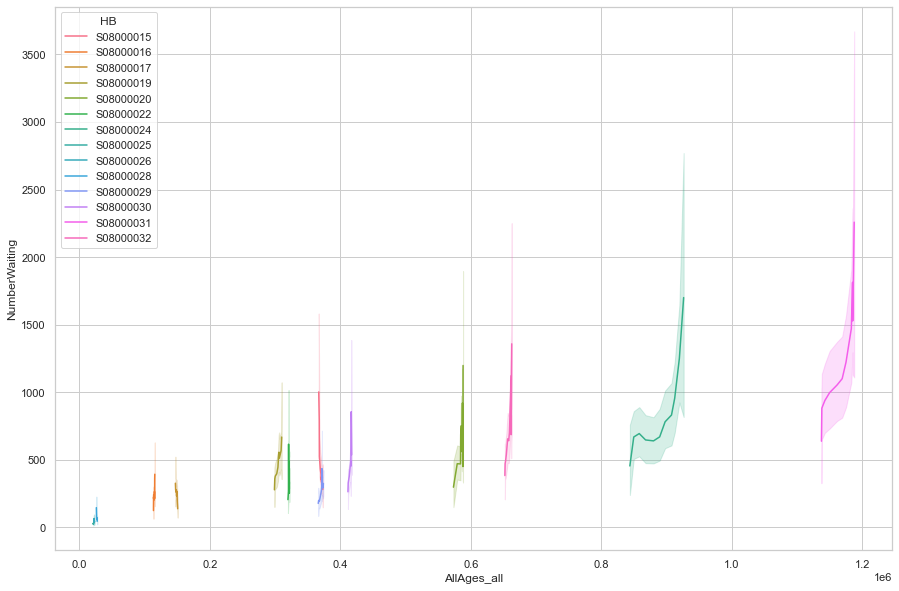

In [44]:
# different HB have different demography and structure of population
fig = plt.figure(figsize=(15,10))
g = sns.lineplot(data=data_features[data_features.HB != 'S92000003'],x='AllAges_all',y = 'NumberWaiting',hue = 'HB')


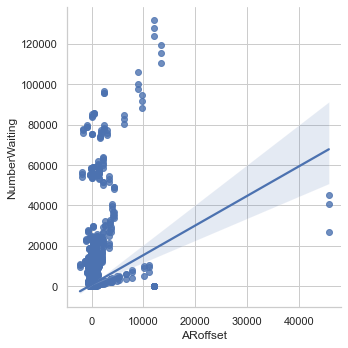

In [46]:
g = sns.lmplot(x="ARoffset", y="NumberWaiting", data = data_features)

In [66]:
data_features[data_features.HB == 'S08000022'].describe()


,NumberWaiting,NumberWaitingOver12Weeks,AllAges_all,AllAges_female,AllAges_male,Children_all,Older_all,UrbanRural8fold2016,Additions,Removals,CountryDecile,HBDecile,HSCPDecile,CADecile,PropFemale,PropChildren,PropOld,ARoffset
count,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000,2506.0,2506.000000,2506.000000,2506.0,2506.0,2506.0,2506.0,2506.0,2506.000000,2506.000000,2506.000000
mean,363.605746,143.786911,321307.650838,163348.045890,157959.604948,63011.393456,68405.436951,5.0,540.836792,494.248204,6.0,5.0,5.0,5.0,51.0,19.542698,21.297686,46.588587
std,907.707978,494.886917,516.767352,298.044939,418.694694,1698.702084,3589.184455,0.0,3482.427602,2905.284736,0.0,0.0,0.0,0.0,0.0,0.543490,1.169801,601.173426
min,1.000000,0.000000,319800.000000,162707.000000,156216.000000,60289.000000,60033.000000,5.0,0.000000,0.000000,6.0,5.0,5.0,5.0,51.0,19.000000,19.000000,-296.000000
25%,9.000000,0.000000,320860.000000,163142.000000,157652.000000,61073.000000,65964.000000,5.0,32.000000,31.000000,6.0,5.0,5.0,5.0,51.0,19.000000,21.000000,-5.000000
50%,56.000000,3.000000,321162.000000,163389.000000,158153.000000,63138.000000,68455.000000,5.0,95.000000,89.000000,6.0,5.0,5.0,5.0,51.0,20.000000,21.000000,1.000000
75%,237.000000,42.000000,321800.000000,163497.000000,158306.000000,64363.000000,71985.000000,5.0,322.000000,306.750000,6.0,5.0,5.0,5.0,51.0,20.000000,22.000000,13.000000
max,7446.000000,4929.000000,321990.000000,163735.000000,158311.000000,66441.000000,74134.000000,5.0,69340.000000,57273.000000,6.0,5.0,5.0,5.0,51.0,21.000000,23.000000,12067.000000


In [75]:
data_features.columns

Index(['Year', 'Month', 'Season', 'HB', 'PatientType', 'Specialty',
       'NumberWaiting', 'NumberWaitingOver12Weeks', 'AllAges_all',
       'AllAges_female', 'AllAges_male', 'Children_all', 'Older_all',
       'UrbanRural8fold2016', 'Additions', 'Removals', 'CountryDecile',
       'HBDecile', 'HSCPDecile', 'CADecile', 'PropFemale', 'PropChildren',
       'PropOld', 'ARoffset'],
      dtype='object')

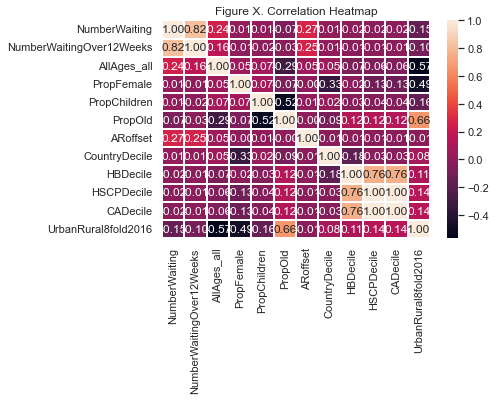

In [88]:
#检查连续非字符型变量的关系
num_attributes = ['NumberWaiting','NumberWaitingOver12Weeks','AllAges_all',
                             'PropFemale','PropChildren','PropOld','ARoffset',
                             'CountryDecile','HBDecile','HSCPDecile','CADecile',
                             'UrbanRural8fold2016']
explore_set = data_features[num_attributes]
# explore_set_ = explore_set.drop(["NumberWaiting",'NumberWaitingOver12Weeks'], axis=1)
sns.heatmap(explore_set.corr(), annot=True, fmt='.2f', linewidths=2)
plt.title("Figure X. Correlation Heatmap")
plt.show()

In [87]:
#find those useful and correlated varaible 
#so we can just choose those useful information to explore in this way we can do feature dimension reduction
from scipy import stats
import numpy as np

y_attribute = 'NumberWaiting' # our responsible variable

def getCorr(data,y):
    """Returns a dataframe with two rows
       first row: correlation between numerical variables and responsible variables
       second row: correlation p-value
    """
    # loop over all the values by columns in our data set
    for i, feature in enumerate(data):
        # calculate the correlation with y_attribute only if it is numerical
        if not ((str(data[feature].dtypes) == "object") or (str(data[feature].dtypes) == "datetime64[ns]")):
            corr = pd.DataFrame(stats.pearsonr(data[feature], data[y]),
                                index = ["cor", "p-value"],
                                columns = [feature])
            # we have to pre-define all_corr to prevent error
            if i == 0:
                all_corr = corr
            else:
                all_corr = pd.concat([all_corr, corr], axis = 1)
    display(all_corr.round(3).sort_values(by="cor", axis=1))

getCorr(explore_set,y_attribute)

,UrbanRural8fold2016,PropOld,HBDecile,HSCPDecile,CADecile,PropChildren,CountryDecile,PropFemale,AllAges_all,ARoffset,NumberWaitingOver12Weeks,NumberWaiting
cor,-0.151,-0.071,-0.02,-0.017,-0.017,0.006,0.011,0.015,0.243,0.271,0.821,1.0
p-value,0.000,0.000,0.00,0.003,0.003,0.323,0.052,0.009,0.000,0.000,0.000,0.0


In [89]:
explore_set

,NumberWaiting,NumberWaitingOver12Weeks,AllAges_all,PropFemale,PropChildren,PropOld,ARoffset,CountryDecile,HBDecile,HSCPDecile,CADecile,UrbanRural8fold2016
0,8.0,0.0,373220.0,52.0,21.0,18.0,16.0,5.0,5.0,5.0,5.0,3.0
1,15.0,0.0,373220.0,52.0,21.0,18.0,16.0,5.0,5.0,5.0,5.0,3.0
2,16.0,0.0,373220.0,52.0,21.0,18.0,16.0,5.0,5.0,5.0,5.0,3.0
3,17.0,0.0,372240.0,52.0,21.0,19.0,0.0,6.0,5.0,5.0,5.0,3.0
4,18.0,0.0,372240.0,52.0,21.0,19.0,0.0,6.0,5.0,5.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32142,8.0,4.0,416550.0,51.0,19.0,21.0,12067.0,6.0,5.0,5.0,5.0,3.0
32143,8.0,6.0,416550.0,51.0,19.0,21.0,12067.0,6.0,5.0,5.0,5.0,3.0
32144,2.0,2.0,320730.0,51.0,20.0,20.0,12067.0,6.0,5.0,5.0,5.0,5.0
32145,2.0,2.0,320730.0,51.0,20.0,20.0,12067.0,6.0,5.0,5.0,5.0,5.0


In [108]:
num_vars = ['AllAges_all','PropOld','PropChildren',
            'PropFemale','ARoffset']

cat_vars = ['UrbanRural8fold2016','HB','Specialty',
            'CountryDecile','HBDecile','HSCPDecile','CADecile',
            'Year']

y_attributes = ['NumberWaiting']

Features = data_features[num_vars + cat_vars + y_attributes]


In [98]:
# Features

## 2.2 Feature Engineering

In [145]:
from sklearn.model_selection import train_test_split
#区分训练集和测试集
class_labels = "HB"
train_data, test_data = train_test_split(Features,     # data to split
                                       stratify = Features[[class_labels]],
                                       train_size=0.77,  # we will leave 77% to test our models on later
                                       shuffle=True,     # prevent data ordering affecting our model
                                       random_state=42)  # make our work reproducable 
display(train_data)
display(test_data)

,AllAges_all,PropOld,PropChildren,PropFemale,ARoffset,UrbanRural8fold2016,HB,Specialty,CountryDecile,HBDecile,HSCPDecile,CADecile,Year,NumberWaiting
23510,1185240.0,16.0,20.0,51.0,76.0,1.0,S08000031,A9,5.0,5.0,5.0,5.0,2020,139.0
9381,579200.0,15.0,20.0,50.0,4.0,3.0,S08000020,J4,6.0,5.0,5.0,5.0,2013,5.0
27149,661891.0,18.0,21.0,52.0,260.0,2.0,S08000032,C1,6.0,5.0,5.0,5.0,2021,1285.0
7639,588100.0,16.0,20.0,50.0,-43.0,3.0,S08000020,C13,7.0,5.0,5.0,5.0,2016,335.0
24240,1149890.0,15.0,20.0,52.0,-68.0,1.0,S08000031,C11,6.0,5.0,5.0,5.0,2015,2321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,367797.0,22.0,20.0,52.0,3.0,3.0,S08000015,AF,6.0,5.0,5.0,5.0,2021,9.0
7261,579200.0,15.0,20.0,50.0,1.0,3.0,S08000020,AQ,6.0,5.0,5.0,5.0,2013,1.0
4916,148860.0,24.0,19.0,51.0,-15.0,4.0,S08000017,F2,6.0,5.0,5.0,5.0,2019,51.0
15974,21580.0,20.0,20.0,50.0,-6.0,7.0,S08000025,F2,6.0,5.0,5.0,5.0,2014,14.0


,AllAges_all,PropOld,PropChildren,PropFemale,ARoffset,UrbanRural8fold2016,HB,Specialty,CountryDecile,HBDecile,HSCPDecile,CADecile,Year,NumberWaiting
28343,656490.0,17.0,21.0,52.0,1.0,2.0,S08000032,H1,5.0,5.0,5.0,5.0,2016,40.0
29304,5463300.0,18.0,20.0,51.0,-14.0,1.0,S92000003,AF,6.0,5.0,5.0,5.0,2019,66.0
3428,148860.0,24.0,19.0,51.0,-4.0,4.0,S08000017,A2,6.0,5.0,5.0,5.0,2019,18.0
15078,919624.0,16.0,20.0,51.0,-3.0,2.0,S08000024,J4,6.0,5.0,5.0,5.0,2021,13.0
5911,309321.0,19.0,20.0,51.0,58.0,3.0,S08000019,C7,6.0,5.0,5.0,5.0,2021,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,23220.0,17.0,22.0,49.0,-21.0,7.0,S08000026,C8,6.0,5.0,5.0,5.0,2014,3.0
21049,417470.0,20.0,19.0,51.0,6.0,3.0,S08000030,AG,6.0,5.0,5.0,5.0,2019,8.0
6939,584550.0,17.0,20.0,50.0,1.0,3.0,S08000020,AD,6.0,5.0,5.0,5.0,2018,7.0
10930,321700.0,22.0,19.0,51.0,16.0,5.0,S08000022,C5,6.0,5.0,5.0,5.0,2019,637.0


In [146]:
y_train = train_data[y_attributes]
X_train = train_data.drop(columns=y_attributes)
y_test = test_data[y_attributes]
X_test = test_data.drop(columns=y_attributes)

In [254]:
# X_train

## Model

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

num_attribs = ['AllAges_all','PropOld','PropChildren','PropFemale','ARoffset',
              'HBDecile','HSCPDecile','CADecile','CountryDecile']
# num_attribs = ['AllAges_all','PropOld','PropChildren',
#             'PropFemale','ARoffset']
cat_attribs = ["UrbanRural8fold2016",'HB','Specialty']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

office_prepared = full_pipeline.fit_transform(train_data)
office_prepared_test = full_pipeline.fit_transform(test_data)

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#train and fit the model using Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(office_prepared,y_train)

office_predictions = lin_reg.predict(office_prepared)
lin_mse = mean_squared_error(y_train, office_predictions)
lin_rmse = np.sqrt(lin_mse)
print('The rmse of the model is:')
print(lin_rmse)

lin_mae = mean_absolute_error(y_train, office_predictions)
print('\nThe Mean Absolute Erro of the model is:')
print(lin_mae)

The rmse of the model is:
3777.580390589271

The Mean Absolute Erro of the model is:
1291.103765967006


In [256]:
data_features.to_csv('Features.csv',encoding = 'utf_8_sig')

In [255]:
data_features

,Year,Month,Season,HB,PatientType,Specialty,NumberWaiting,NumberWaitingOver12Weeks,AllAges_all,AllAges_female,...,Additions,Removals,CountryDecile,HBDecile,HSCPDecile,CADecile,PropFemale,PropChildren,PropOld,ARoffset
0,2012,10,IV,S08000015,Inpatient/Day case,A1,8.0,0.0,373220.0,194546.0,...,104.0,88.0,5.0,5.0,5.0,5.0,52.0,21.0,18.0,16.0
1,2012,11,IV,S08000015,Inpatient/Day case,A1,15.0,0.0,373220.0,194546.0,...,104.0,88.0,5.0,5.0,5.0,5.0,52.0,21.0,18.0,16.0
2,2012,12,IV,S08000015,Inpatient/Day case,A1,16.0,0.0,373220.0,194546.0,...,104.0,88.0,5.0,5.0,5.0,5.0,52.0,21.0,18.0,16.0
3,2013,01,I,S08000015,Inpatient/Day case,A1,17.0,0.0,372240.0,193999.0,...,85.0,85.0,6.0,5.0,5.0,5.0,52.0,21.0,19.0,0.0
4,2013,02,I,S08000015,Inpatient/Day case,A1,18.0,0.0,372240.0,193999.0,...,85.0,85.0,6.0,5.0,5.0,5.0,52.0,21.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32142,2020,05,II,S08000030,Inpatient/Day case,D8,8.0,4.0,416550.0,213455.0,...,69340.0,57273.0,6.0,5.0,5.0,5.0,51.0,19.0,21.0,12067.0
32143,2020,06,II,S08000030,Inpatient/Day case,D8,8.0,6.0,416550.0,213455.0,...,69340.0,57273.0,6.0,5.0,5.0,5.0,51.0,19.0,21.0,12067.0
32144,2014,10,IV,S08000022,Inpatient/Day case,E12,2.0,2.0,320730.0,163265.0,...,69340.0,57273.0,6.0,5.0,5.0,5.0,51.0,20.0,20.0,12067.0
32145,2014,11,IV,S08000022,Inpatient/Day case,E12,2.0,2.0,320730.0,163265.0,...,69340.0,57273.0,6.0,5.0,5.0,5.0,51.0,20.0,20.0,12067.0


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer

# pipeline 
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])
# specify what column we want to apply a function to Pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), # standardscale
    ("cat", OneHotEncoder(), cat_attribs), # one-hot

])

num_attribs = 
cat_attribs = 

ridge_pipe = Pipeline([
("pre_processing", ColumnTransformer([
("comb_pre", num_pre, num_attribs),
("cat_pre", cat_pre, cat_attribs)])),
("model", Ridge())
])

ridge_pipe.fit(train_set, y_train)

pred_train_y = ridge_pipe.predict(train_set)
pred_test_y = ridge_pipe.predict(test_set)

GetModelResult(ridge_pipe,pred_train_y,pred_test_y,y_train,y_test,plot = True)

In [310]:
len(data_features.Specialty.unique())

37

In [144]:
X_train

,AllAges_all,PropOld,PropChildren,PropFemale,ARoffset,UrbanRural8fold2016,HB,Specialty,CountryDecile,HBDecile,HSCPDecile,CADecile,Year
6817,584550.0,17.0,20.0,50.0,0.0,3.0,S08000020,A9,6.0,5.0,5.0,5.0,2018
10305,321900.0,21.0,20.0,51.0,2.0,5.0,S08000022,AR,6.0,5.0,5.0,5.0,2016
25908,1137920.0,15.0,20.0,52.0,7.0,1.0,S08000031,H1,6.0,5.0,5.0,5.0,2013
17301,26500.0,25.0,19.0,51.0,-16.0,7.0,S08000028,C1,5.0,5.0,5.0,5.0,2020
29124,5475660.0,18.0,20.0,51.0,-12.0,1.0,S92000003,A9,6.0,5.0,5.0,5.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11143,321990.0,21.0,20.0,51.0,-35.0,5.0,S08000022,C8,6.0,5.0,5.0,5.0,2017
27665,654490.0,16.0,22.0,52.0,159.0,2.0,S08000032,C7,6.0,5.0,5.0,5.0,2015
24571,1185013.0,16.0,20.0,51.0,0.0,1.0,S08000031,C3,6.0,5.0,5.0,5.0,2021
22870,1137920.0,15.0,20.0,52.0,-2.0,1.0,S08000031,A1,6.0,5.0,5.0,5.0,2013


In [154]:
y_test

,NumberWaiting
28343,40.0
29304,66.0
3428,18.0
15078,13.0
5911,252.0
...,...
16885,3.0
21049,8.0
6939,7.0
10930,637.0


In [201]:
from statsmodels.formula.api import ols

ols_model = ols(formula='NumberWaiting ~ AllAges_all + PropOld + PropChildren + PropFemale + ARoffset', data=explore_set)
ols_result = ols_model.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NumberWaiting   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     924.3
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:11:53   Log-Likelihood:            -3.1423e+05
No. Observations:               32147   AIC:                         6.285e+05
Df Residuals:                   32141   BIC:                         6.285e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      979.4064   1913.097      0.512      0.609   -2770.337    4729.149
AllAges_all      0.0007    1.6e-05     41.163      0.000       0.001       0.001
PropOld        -21.7399     10.466     -2.077      0.038     -42.255      -1.225
PropChildren  -113.4651     36.536     -3.106      0.002    -185.077     -41.854
PropFemale      35.5177     34.000      1.045      0.296     -31.123     102.159
ARoffset         1.3976      0.028     49.459      0.000       1.342       1.453
==============================================================================
Omnibus:                    56331.360   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         65801450.541
Skew:                          12.535   Prob(JB):                         0.00
Kurtosis:                     223.220   Cond. No.                     1.51e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

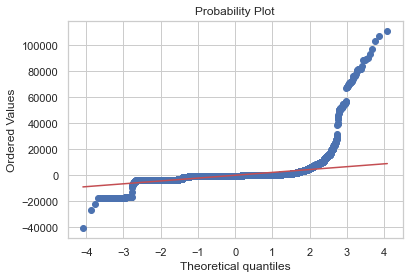

In [202]:
import seaborn as sns
import scipy.stats

_ = scipy.stats.probplot(ols_result.resid, plot=sns.mpl.pyplot)

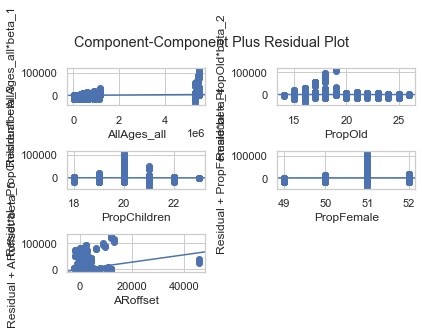

In [213]:
fig = sm.graphics.plot_ccpr_grid(ols_result)
fig.tight_layout(pad=1.0)

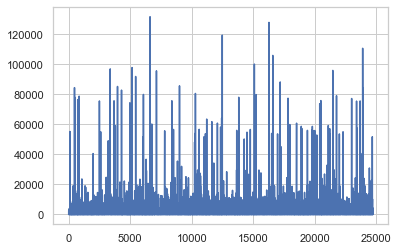

In [212]:
plt.plot(y)

In [181]:
exog

array([[ 1.00000e+00,  1.18524e+06,  1.60000e+01, ...,  5.10000e+01,
         7.60000e+01,  1.00000e+00],
       [ 1.00000e+00,  5.79200e+05,  1.50000e+01, ...,  5.00000e+01,
         4.00000e+00,  3.00000e+00],
       [ 1.00000e+00,  6.61891e+05,  1.80000e+01, ...,  5.20000e+01,
         2.60000e+02,  2.00000e+00],
       ...,
       [ 1.00000e+00,  1.48860e+05,  2.40000e+01, ...,  5.10000e+01,
        -1.50000e+01,  4.00000e+00],
       [ 1.00000e+00,  2.15800e+04,  2.00000e+01, ...,  5.00000e+01,
        -6.00000e+00,  7.00000e+00],
       [ 1.00000e+00,  9.07580e+05,  1.50000e+01, ...,  5.10000e+01,
        -1.30000e+01,  2.00000e+00]])

In [221]:
import statsmodels.api as sm
x = X_train[['AllAges_all','PropOld','PropChildren','PropFemale','ARoffset','UrbanRural8fold2016']].to_numpy()
y = y_train.to_numpy()
exog, endog = sm.add_constant(x), y
mod = sm.GLM(endog, exog,
             family=sm.families.Poisson(link=sm.families.links.log()))
res = mod.fit()

In [229]:
res.summary()
yhat = res.mu

In [231]:
res.resid_pearson

array([-35.75453859, -21.65911431,  29.78159946, ..., -19.09365255,
        -5.52907307, -18.58114491])

In [232]:
yhat_ = yhat

array([1543.87239439,  479.0650478 ,  572.44852976, ...,  460.92456197,
         55.00749838,  714.77046909])

In [239]:
yhat[yhat < 170000]

array([1543.87239439,  479.0650478 ,  572.44852976, ...,  460.92456197,
         55.00749838,  714.77046909])

Text(0.5, 0, 'Fitted values')

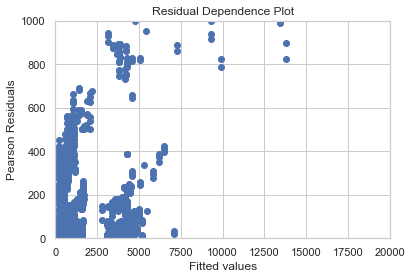

In [243]:
fig, ax = plt.subplots()

ax.scatter(yhat, res.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 20000)
ax.set_ylim(0, 1000)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

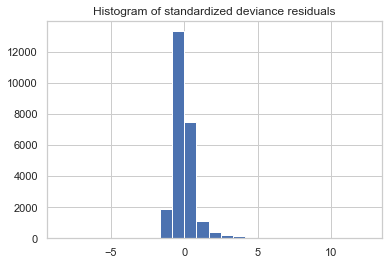

In [225]:
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


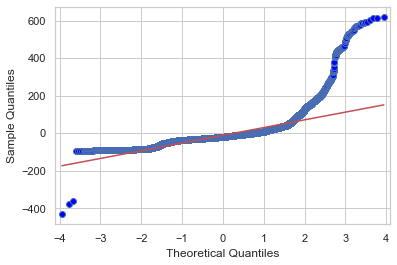

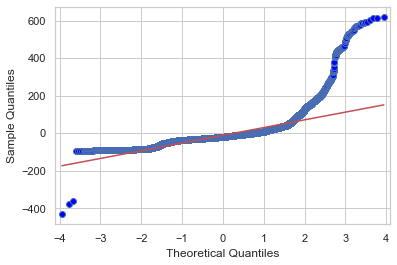

In [226]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')

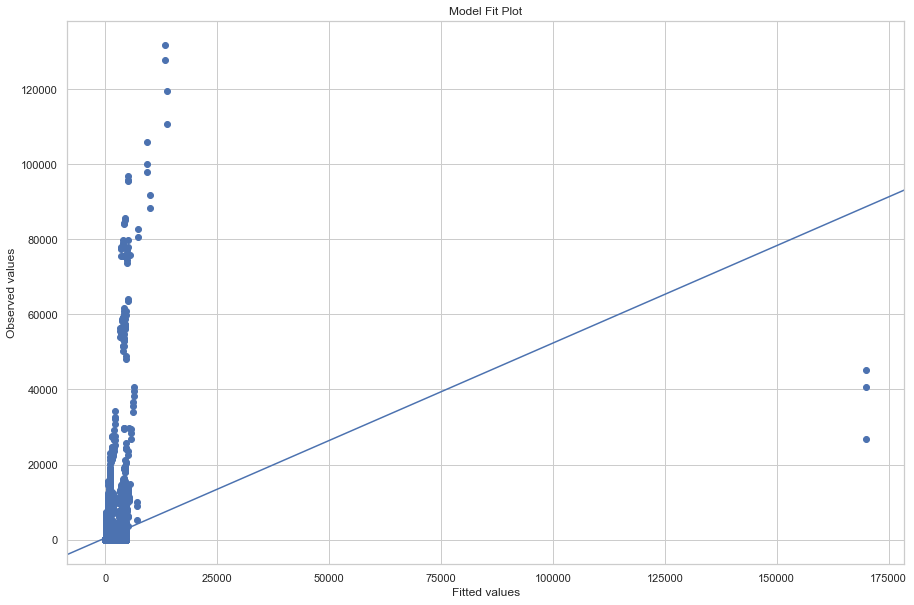

In [247]:
from statsmodels.graphics.api import abline_plot

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)

# ax.set_xlim(0, 20000)
ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

(-50.0, 200.0)

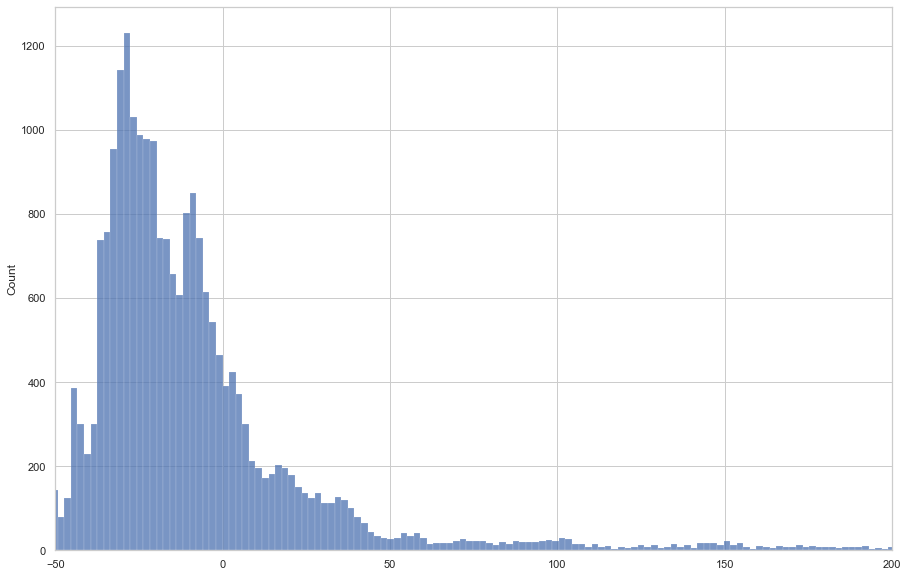

In [252]:
fig,ax = plt.subplots(figsize=(15,10))
sns.histplot(res.resid_deviance)
ax.set_xlim(-50, 200)

In [259]:
Features

,AllAges_all,PropOld,PropChildren,PropFemale,ARoffset,UrbanRural8fold2016,HB,Specialty,CountryDecile,HBDecile,HSCPDecile,CADecile,Year,NumberWaiting
0,373220.0,18.0,21.0,52.0,16.0,3.0,S08000015,A1,5.0,5.0,5.0,5.0,2012,8.0
1,373220.0,18.0,21.0,52.0,16.0,3.0,S08000015,A1,5.0,5.0,5.0,5.0,2012,15.0
2,373220.0,18.0,21.0,52.0,16.0,3.0,S08000015,A1,5.0,5.0,5.0,5.0,2012,16.0
3,372240.0,19.0,21.0,52.0,0.0,3.0,S08000015,A1,6.0,5.0,5.0,5.0,2013,17.0
4,372240.0,19.0,21.0,52.0,0.0,3.0,S08000015,A1,6.0,5.0,5.0,5.0,2013,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32142,416550.0,21.0,19.0,51.0,12067.0,3.0,S08000030,D8,6.0,5.0,5.0,5.0,2020,8.0
32143,416550.0,21.0,19.0,51.0,12067.0,3.0,S08000030,D8,6.0,5.0,5.0,5.0,2020,8.0
32144,320730.0,20.0,20.0,51.0,12067.0,5.0,S08000022,E12,6.0,5.0,5.0,5.0,2014,2.0
32145,320730.0,20.0,20.0,51.0,12067.0,5.0,S08000022,E12,6.0,5.0,5.0,5.0,2014,2.0


In [257]:
from statsmodels.genmod.bayes_mixed_glm import PoissonBayesMixedGLM, BinomialBayesMixedGLM

In [282]:
random = {"HB": '0 + C(HB)', "Specialty": '0 + C(Specialty)'}
formula = 'NumberWaiting ~ AllAges_all + PropOld+PropChildren+PropFemale+ ARoffset + UrbanRural8fold2016'
model = PoissonBayesMixedGLM.from_formula(formula,random, Features)
result = model.fit_vb()

In [303]:
result.summary()

,Type,Post. Mean,Post. SD,SD,SD (LB),SD (UB)
Intercept,M,0.0000,0.5964,,,
AllAges_all,M,0.0000,0.6754,,,
PropOld,M,0.0000,0.5225,,,
PropChildren,M,0.0000,0.5167,,,
PropFemale,M,0.0000,0.6417,,,
ARoffset,M,0.0000,0.6342,,,
UrbanRural8fold2016,M,0.0000,0.5764,,,
HB,V,0.0000,0.5712,1.000,0.319,3.134
Specialty,V,0.0000,0.6426,1.000,0.277,3.616


In [301]:
result.model.predict

<bound method _BayesMixedGLM.predict of <statsmodels.genmod.bayes_mixed_glm.PoissonBayesMixedGLM object at 0x7fc29ae8ab20>>

In [285]:
result.fe_sd

array([0.59639288, 0.67543602, 0.52246665, 0.51667203, 0.6417206 ,
       0.63421261, 0.57639881])

In [281]:
result.vc_sd

array([0.51537954, 0.65485307, 0.62097761, 0.7133658 , 0.68790235,
       0.6155692 , 0.61172824, 0.58316134, 0.85597266, 0.57888836,
       0.56895591, 0.74253671, 0.5609372 , 0.57562216, 0.73511447,
       0.62316587, 0.60191679, 0.657077  , 0.54538381, 0.65756227,
       0.62335361, 0.65571293, 0.50212075, 0.49126414, 0.711687  ,
       0.63378169, 0.64077545, 0.57100597, 0.51608456, 0.58692858,
       0.52724622, 0.52778239, 0.70231819, 0.6271157 , 0.5811784 ,
       0.5408284 , 0.61730287, 0.53038053, 0.52687846, 0.64586585,
       0.5902327 , 0.5307561 , 0.57430946, 0.63175954, 0.62610802,
       0.63766842, 0.64729359, 0.60859867, 0.62744585, 0.65783753,
       0.66319376, 0.69059468])

In [315]:
pip install pymer4

     |████████████████████████████████| 59 kB 2.7 MB/s eta 0:00:011
     |████████████████████████████████| 194 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 339 kB 2.7 MB/s eta 0:00:01
  Created wheel for rpy2: filename=rpy2-3.4.5-py3-none-any.whl size=198821 sha256=470cecfa4dfdf22e76b89b6df6d8b3956a73a6e51cd12704ed5e2cb7b8b7fc02
  Stored in directory: /Users/peilong/Library/Caches/pip/wheels/36/d1/63/882c1f63d21bcf817b7db960b9536a747d4258daeaace0edd4
Successfully built rpy2
Note: you may need to restart the kernel to use updated packages.


In [316]:
from pymer4.models import Lmer

In [321]:
from pymer4.models import glmer

ImportError: cannot import name 'glmer' from 'pymer4.models' (/opt/anaconda3/lib/python3.9/site-packages/pymer4/models/__init__.py)